The child.iq folder contains a subset of children and mother data discussed earlier in the chapter. You have access to children's test scores at age 3, mother's education, and mother's age at the time she gave birth for a sample of 400 children. The data are in a Stata file.

(Note: I've been unable to open up childiq.dta due to some error with the Stata version. I'm going to continue this exercise using kidiq.dta, which is in the same folder. This doesn't contain the mother's education level. I'll use the mom's work variable as a proxy.)

### Part a
Fit a regression of child test scores on mother's age, display the data and fitted model, check assumptions, and interpret the slope coefficient. When do you recommend mothers should give birth? What are you assuming in making these recommendations?

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures # For part c

In [2]:
# Load the data (may be in a different path)
df = pd.read_stata('../ARM_Data/child.iq/kidiq.dta')
df.head(10)

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27
5,98,0.0,107.901838,1,18
6,69,1.0,138.893106,4,20
7,106,1.0,125.145119,3,23
8,102,1.0,81.619526,1,24
9,95,1.0,95.073069,1,19


In [3]:
# Create linear regression

x_mother_age = df['mom_age'].as_matrix()
y_kid_score = df['kid_score'].as_matrix()

# Convert the shape of the feature column from (n_features,) to (n_features,1)
x_mother_age = x_mother_age[:, np.newaxis]

In [4]:
regr = linear_model.LinearRegression()
regr.fit(x_mother_age, y_kid_score)
y_kid_score_pred = regr.predict(x_mother_age)

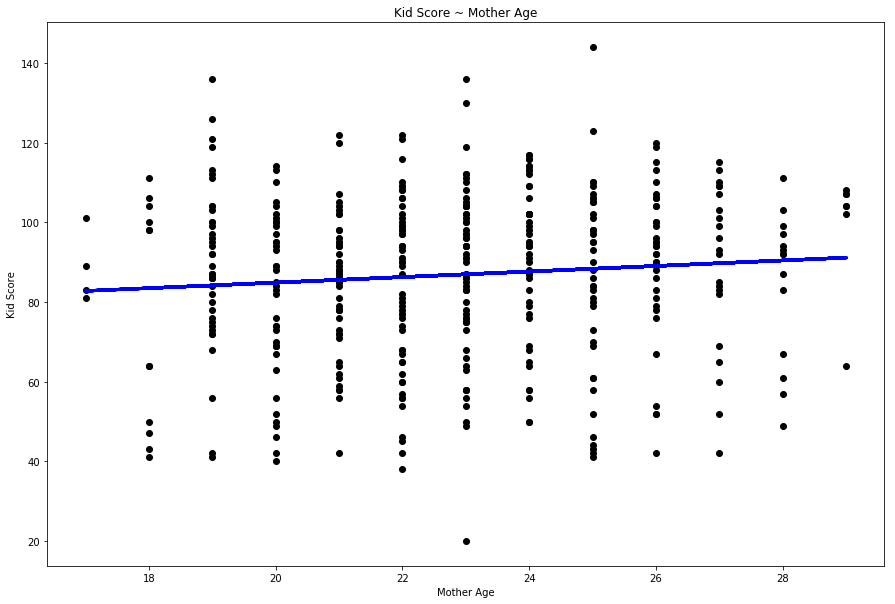

In [5]:
# Display the data and the fitted output
plt.figure(figsize=(15,10))
plt.scatter(x_mother_age, y_kid_score, color='black')
plt.plot(x_mother_age, y_kid_score_pred, color='blue', linewidth=3)
plt.title('Kid Score ~ Mother Age')
plt.xlabel('Mother Age')
plt.ylabel('Kid Score')
plt.show()

In [6]:
print('Coefficients:\n{c}'.format(c=regr.coef_))
print('Intercepts:\n{i}'.format(i=regr.intercept_))

Coefficients:
[ 0.6951862]
Intercepts:
70.95692092919448


#### Assumptions
##### Validity
For this part, we are trying to determine whether or not there is a linear relationship between a mother's age and a child's test score. The roughly 400 datapoints here contains mother's age at the time of the kid's birth and the kid's test score. While we may be able to infer a relationship (and the regression suggests there is one) between the two, we can't really extend it to the larger population without knowing how the data was obtained. Some concerns, for example: 
- *Are the test scores from the same school or different schools? Are they from the same school district? Are the tests all equivalent?*

##### Additivity or linearity
As we only have a single predictor, additivity and linearity aren't a concern to us. However, we can check anyway by plotting the residuals against the dependent variable. We will see that there is no curve in the plot.

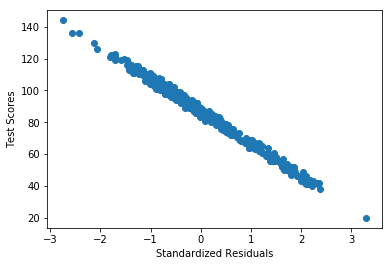

In [7]:
# Create dataframe of errors
errors = pd.DataFrame(y_kid_score_pred - y_kid_score)
std_errors = (errors - np.mean(errors))/np.std(errors)

plt.scatter(std_errors, y_kid_score)
plt.xlabel('Standardized Residuals')
plt.ylabel('Test Scores')
plt.show()

##### Independence of Errors
The **independence of errors** assumption can be checked by shifting the errors of the prediction and seeing if there is a relationship between the shifted/non-shifted values.

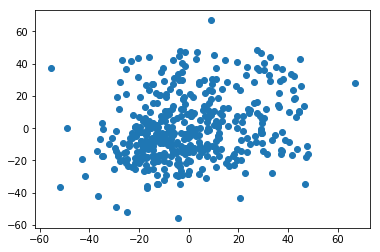

In [8]:
# Create shifted data
df_errors = pd.concat([errors.shift(1), errors], axis=1)
df_errors.columns = ['t-1', 't+1']
plt.scatter(df_errors['t-1'], df_errors['t+1'])
plt.show()

##### Equal Variance of Errors
The **equal variance of errors** assumption is already checked when we checked for linearity as the residuals are not fanning out

##### Normality of Errors
The **normality of errors** assumption can be checked by plotting the distribution of the errors. The authors really dismiss its importance however. The histogram does not entirely appear to be normal, however. 

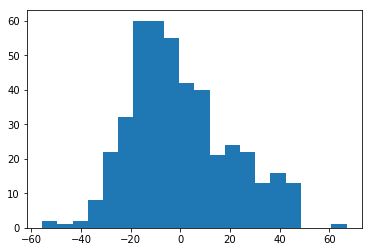

In [9]:
plt.hist(errors, bins=20)
plt.show()

#### Recommendations

The data suggests that the older a mother is when giving birth, the higher test score the child receives. Just based on this data alone (and nothing else), the recommendation would be for mothers to give birth when they are 29. If the trend continues, they should consider giving birth much later for even smarter kids. I'm being sarcastic, there's obviously more to this story as we will soon see.

### Part b
Repeat this for a regression that further includes mother's ~~education~~ work level, interpreting both slope coefficients in this model. Have your conclusions about the timing of birth changed?

Fit a regression of child test scores on mother's age, display the data and fitted model, check assumptions, and interpret the slope coefficient. When do you recommend mothers should give birth? What are you assuming in making these recommendations?

In [157]:
x_mother_age_work = df[['mom_age','mom_work']].as_matrix()
regr = linear_model.LinearRegression()
regr.fit(x_mother_age_work, y_kid_score)
y_kid_score_pred = regr.predict(x_mother_age_work)

In [35]:
print("Estimated intercept: {i}\n".format(i=regr.intercept_))
print("Number of coefficients: {i}\n".format(i=len(regr.coef_)))
pd.DataFrame(list(zip(df[['mom_age','mom_work']].columns, regr.coef_)), columns=['Features','Coefficient'])

Estimated intercept: 68.91609764393719

Number of coefficients: 2



,Features,Coefficient
0,mom_age,0.616843
1,mom_work,1.320967


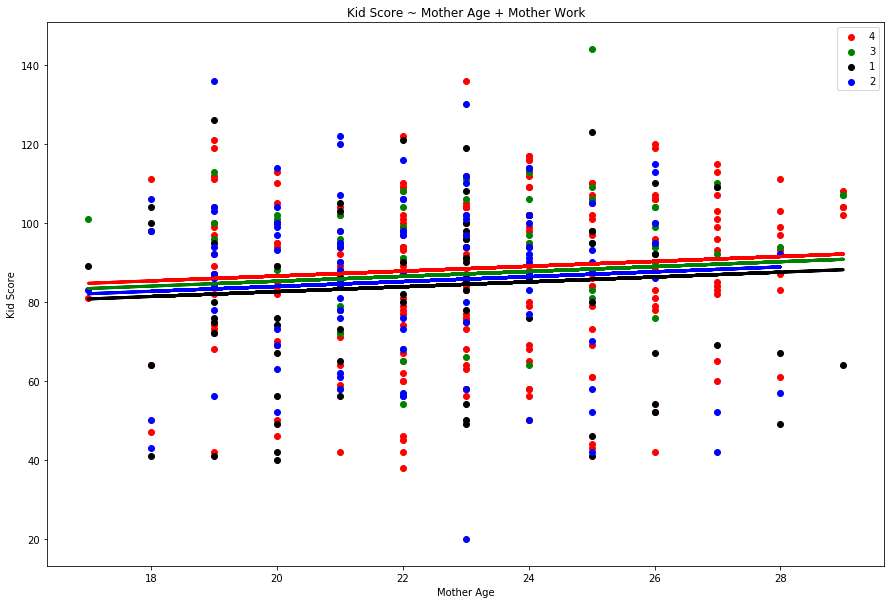

In [65]:
# Display the data and the fitted output
plt.figure(figsize=(15,10))
colors = {1 : 'black', 2: 'blue', 3: 'green', 4: 'red'}
for i in df['mom_work'].unique():
    x_dataframe = df[df['mom_work'] == i]['mom_age'].as_matrix()
    y_dataframe = df[df['mom_work'] == i]['kid_score'].as_matrix()
    plt.scatter(x_dataframe, y_dataframe, color=colors[i], label='{l}'.format(l=i))
    plt.plot(x_dataframe, pd.DataFrame(y_kid_score_pred).loc[list(df[df['mom_work'] == i].index)], color=colors[i], linewidth=3)
plt.legend()
plt.title('Kid Score ~ Mother Age + Mother Work')
plt.xlabel('Mother Age')
plt.ylabel('Kid Score')
plt.show()

I don't know exactly what the mother's work feature means. I'm assuming that the higher the number, the "higher" the role. The data does suggest this to be the case, with the predictions showing a step increase in the child's score as the mother's work level increases. Furthermore, as a predictor of the children's score, the mother's work feature outperforms the mother's age. 

### Part c
Now create an indicator variable reflecting whether the mother had completed high school or not. Construct interactions between the high school completion and the mother's age in family. Also, create a plot that shows the separate regression lines for each high school completion status group.

In [68]:
# The dataset already treats the mother's high school completion
# as a boolean integer, so no need to create the variable
df.head(5)

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


In [126]:
x_mother_work = df[['mom_work']].as_matrix()
x_mother_age_highschool = df[['mom_age','mom_hs']].as_matrix()

In [138]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
x_mother_age_highschool_interaction = poly.fit_transform(x_mother_age_highschool)
x_mother_age_work_highschool_interaction = np.hstack((x_mother_work, x_mother_age_highschool_interaction))

In [140]:
regr = linear_model.LinearRegression()
regr.fit(x_mother_age_work_highschool_interaction, y_kid_score)
y_kid_score_pred = regr.predict(x_mother_age_work_highschool_interaction)

In [142]:
features_dataframe = pd.DataFrame(x_mother_age_work_highschool_interaction, columns=['mom_work','mom_hs','mom_age','1','mom_hs^2','mom_hs*mom_age','mom_age^2'])

In [143]:
print("Estimated intercept: {i}\n".format(i=regr.intercept_))
print("Number of coefficients: {i}\n".format(i=len(regr.coef_)))
pd.DataFrame(list(zip(features_dataframe.columns, regr.coef_)), columns=['Features','Coefficient'])

Estimated intercept: 113.18041551092199

Number of coefficients: 7



,Features,Coefficient
0,mom_work,4.272253e-01
1,mom_hs,-2.897682e-14
2,mom_age,-1.841276e+00
3,1,-2.057251e+01
4,mom_hs^2,6.893019e-03
5,mom_hs*mom_age,2.372227e+00
6,mom_age^2,-2.057251e+01


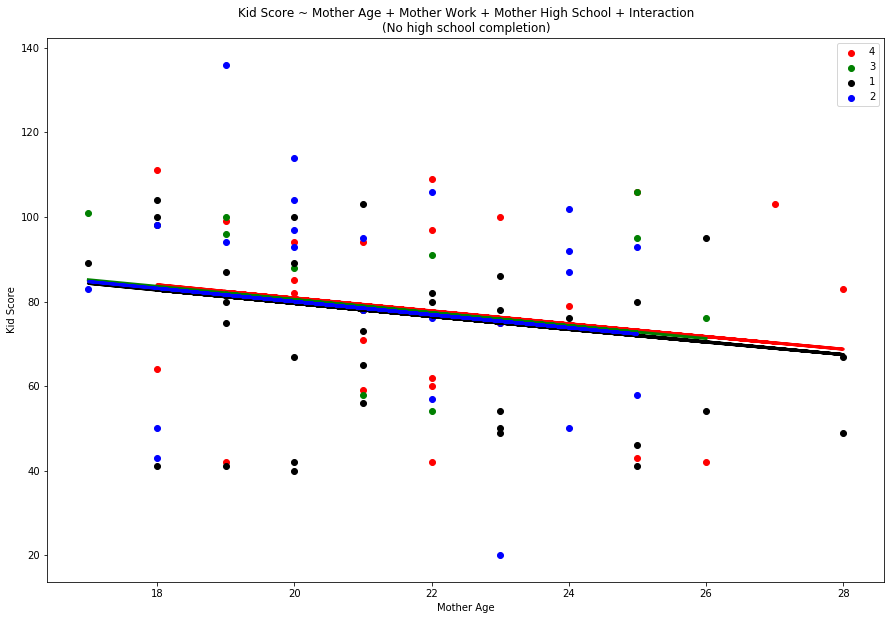

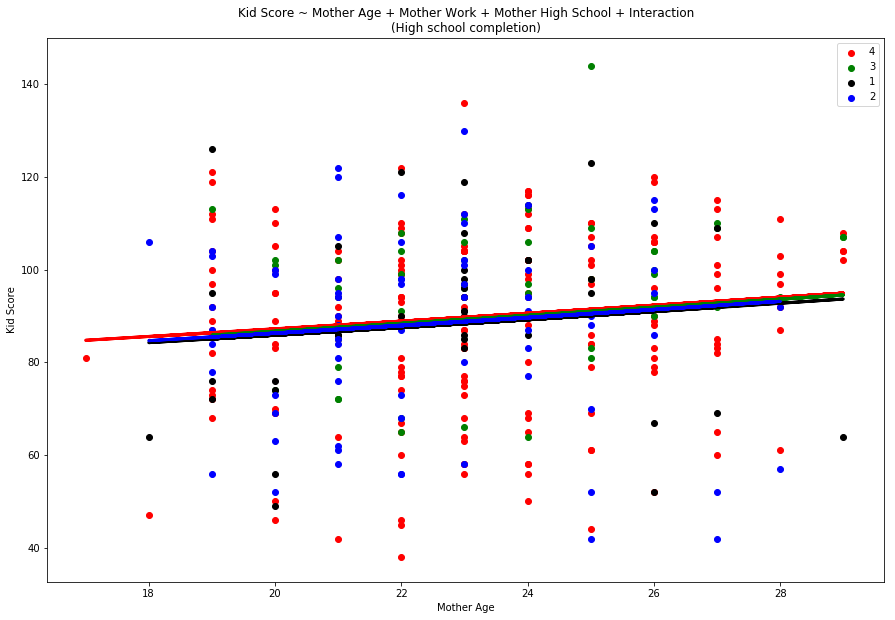

In [154]:
# Display the data for each high school completion group

# df[(df['mom_work'] == i) & (df['mom_hs']==0)]

plt.figure(figsize=(15,10))
colors = {1 : 'black', 2: 'blue', 3: 'green', 4: 'red'}
for i in df['mom_work'].unique():
    sub_dataframe = df[(df['mom_work'] == i) & (df['mom_hs'] == 0)]
    x_dataframe = sub_dataframe['mom_age'].as_matrix()
    y_dataframe = sub_dataframe['kid_score'].as_matrix()
    plt.scatter(x_dataframe, y_dataframe, color=colors[i], label='{l}'.format(l=i))
    plt.plot(x_dataframe, pd.DataFrame(y_kid_score_pred).loc[list(sub_dataframe.index)], color=colors[i], linewidth=3)
plt.legend()
plt.title('Kid Score ~ Mother Age + Mother Work + Mother High School + Interaction\n(No high school completion)')
plt.xlabel('Mother Age')
plt.ylabel('Kid Score')
plt.show()

plt.figure(figsize=(15,10))
colors = {1 : 'black', 2: 'blue', 3: 'green', 4: 'red'}
for i in df['mom_work'].unique():
    sub_dataframe = df[(df['mom_work'] == i) & (df['mom_hs'] == 1)]
    x_dataframe = sub_dataframe['mom_age'].as_matrix()
    y_dataframe = sub_dataframe['kid_score'].as_matrix()
    plt.scatter(x_dataframe, y_dataframe, color=colors[i], label='{l}'.format(l=i))
    plt.plot(x_dataframe, pd.DataFrame(y_kid_score_pred).loc[list(sub_dataframe.index)], color=colors[i], linewidth=3)
plt.legend()
plt.title('Kid Score ~ Mother Age + Mother Work + Mother High School + Interaction\n(High school completion)')
plt.xlabel('Mother Age')
plt.ylabel('Kid Score')
plt.show()

This is pretty amazing. When a mother hasn't completed high school, then a latter age at birth averages to a lower test score. When a mother has, then the opposite is true. 

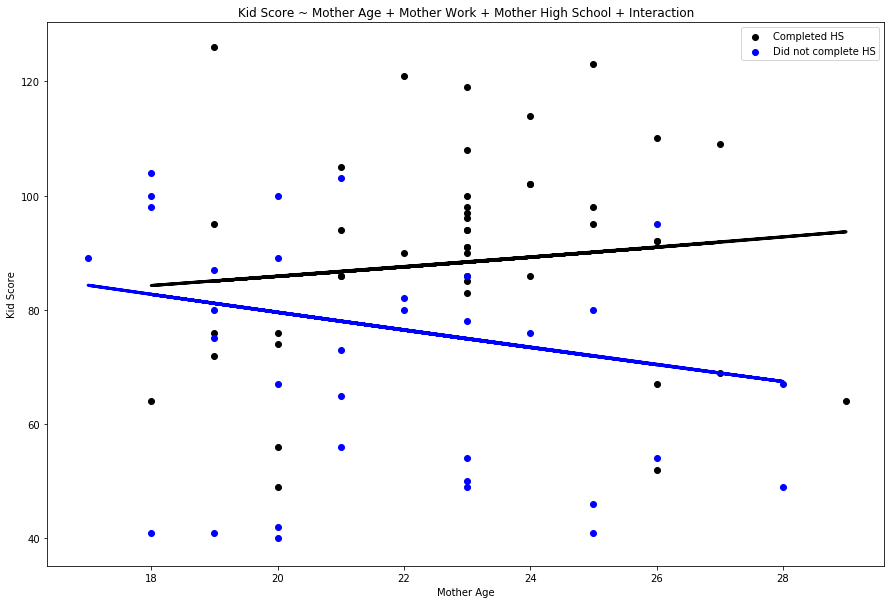

In [156]:
plt.figure(figsize=(15,10))
sub_dataframe = df[(df['mom_work'] == 1) & (df['mom_hs'] == 1)]
x_dataframe = sub_dataframe['mom_age'].as_matrix()
y_dataframe = sub_dataframe['kid_score'].as_matrix()
plt.scatter(x_dataframe, y_dataframe, color='black', label='Completed HS')
plt.plot(x_dataframe, pd.DataFrame(y_kid_score_pred).loc[list(sub_dataframe.index)], color='black', linewidth=3)

sub_dataframe = df[(df['mom_work'] == 1) & (df['mom_hs'] == 0)]
x_dataframe = sub_dataframe['mom_age'].as_matrix()
y_dataframe = sub_dataframe['kid_score'].as_matrix()
plt.scatter(x_dataframe, y_dataframe, color='blue', label='Did not complete HS')
plt.plot(x_dataframe, pd.DataFrame(y_kid_score_pred).loc[list(sub_dataframe.index)], color='blue', linewidth=3)
plt.legend()
plt.title('Kid Score ~ Mother Age + Mother Work + Mother High School + Interaction')
plt.xlabel('Mother Age')
plt.ylabel('Kid Score')
plt.show()

Restricting this to mother's with work class 1, shows an average difference of nearly 20 points for mother's at 28 years of age.

### Part d
Finally, fit a regression of child test scores on mother's age and education level for the first 200 children and use this model to predict test scores for the next 200. Graphically display comparisons of the predicted and actual scores for the final 200 children.

In [187]:
x_mother_age_work = df[['mom_age','mom_work']].as_matrix()
regr = linear_model.LinearRegression()
regr.fit(x_mother_age_work[:200], y_kid_score[:200])
y_kid_score_pred = regr.predict(x_mother_age_work[200:])
y_kid_score_actual = y_kid_score[200:]

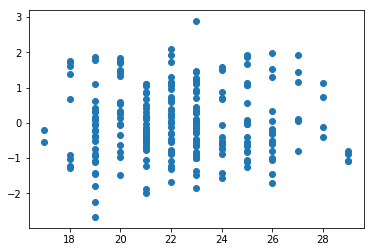

In [188]:
# Create dataframe of errors
errors = pd.DataFrame(y_kid_score_pred - y_kid_score_actual)
std_errors = (errors - np.mean(errors))/np.std(errors)

plt.scatter(pd.DataFrame(x_mother_age_work[200:])[0], std_errors)
plt.show()

This doesn't seem particularly good at prediction